선 도표(LINE CHART)

## 1. 기본 선 그래프 (Matplotlib 사용)

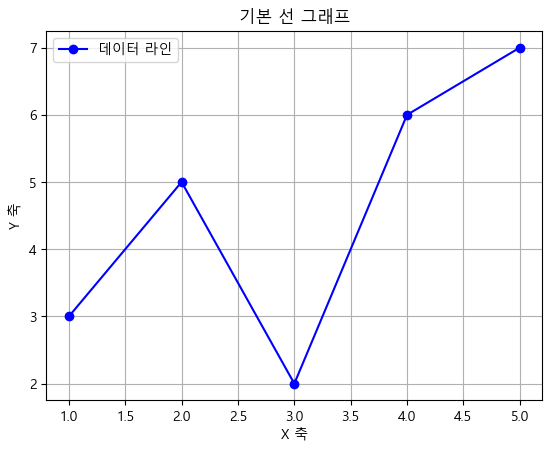

In [2]:
import matplotlib.pyplot as plt

# Windows에서 한글이 잘 보이는 기본 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

# 데이터
x = [1, 2, 3, 4, 5]
y = [3, 5, 2, 6, 7]

# 선 그래프
plt.plot(x, y, label='데이터 라인', color='blue', linestyle='-', marker='o')

# 제목 및 레이블
plt.title('기본 선 그래프')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.legend()
plt.grid(True)
plt.show()


### 삼성전자 사례

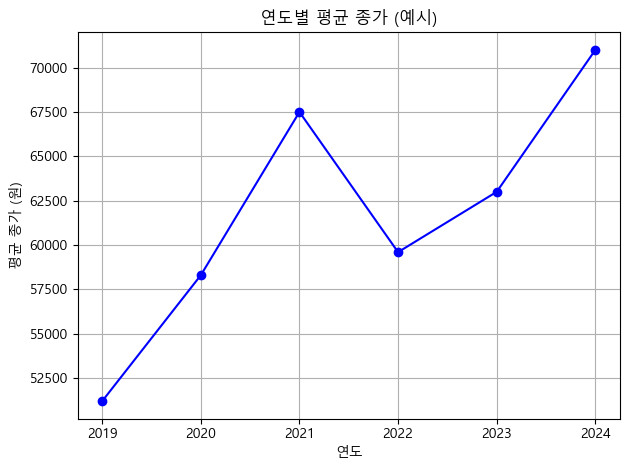

In [7]:
import matplotlib.pyplot as plt

# Windows에서 한글이 잘 보이는 기본 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

# 연도별 데이터
years = [2019, 2020, 2021, 2022, 2023, 2024]
values = [51200, 58300, 67500, 59600, 63000, 71000]

# 선 그래프 그리기
plt.plot(years, values, marker='o', linestyle='-', color='blue')

# 레이블과 제목
plt.title("연도별 평균 종가 (예시)")
plt.xlabel("연도")
plt.ylabel("평균 종가 (원)")
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()


## 2. 금융 데이터: 삼성전자 종가 추이 (pykrx 활용)

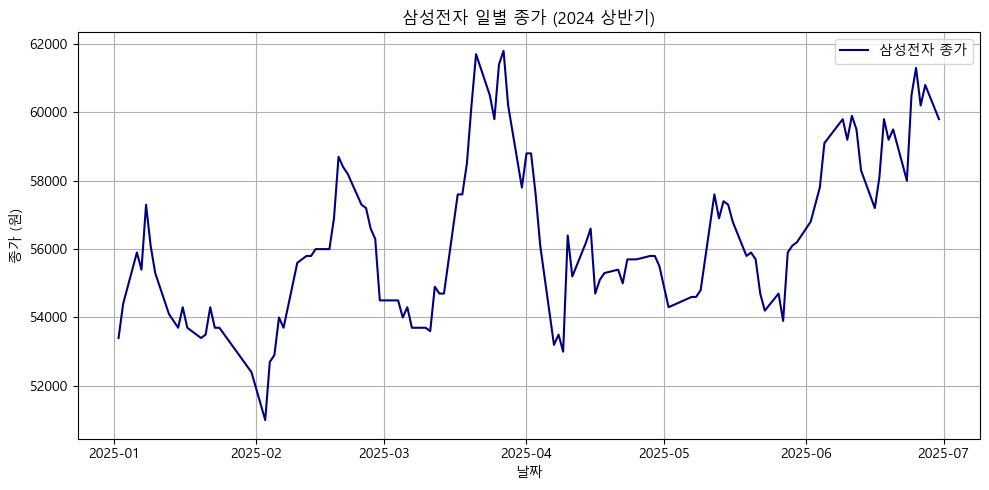

In [11]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = stock.get_market_ohlcv_by_date("2025-01-01", "2025-06-30", "005930")  # 삼성전자
df.index = pd.to_datetime(df.index)

# 종가 시각화
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['종가'], label='삼성전자 종가', color='navy')

plt.title('삼성전자 일별 종가 (2024 상반기)')
plt.xlabel('날짜')
plt.ylabel('종가 (원)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


####  삼성전자 연도별 평균 종가 시각화

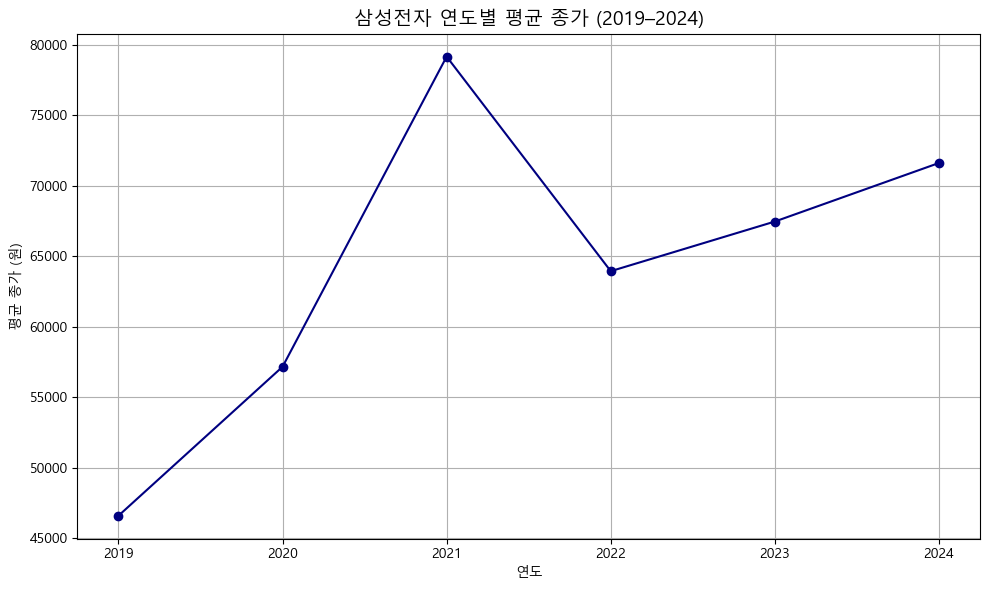

In [8]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 연도 목록
years = list(range(2019, 2025))
avg_prices = []

# 각 연도별로 평균 종가 계산
for year in years:
    start = f"{year}-01-01"
    end = f"{year}-12-31"
    df = stock.get_market_ohlcv_by_date(start, end, "005930")  # 삼성전자
    avg_close = df['종가'].mean()
    avg_prices.append(avg_close)

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, avg_prices, marker='o', linestyle='-', color='navy')

# 그래프 꾸미기
plt.title("삼성전자 연도별 평균 종가 (2019–2024)", fontsize=14)
plt.xlabel("연도")
plt.ylabel("평균 종가 (원)")
plt.xticks(years)
plt.grid(True)
plt.tight_layout()
plt.show()


## 3. 다중 선 그래프 (삼성전자 vs SK하이닉스)

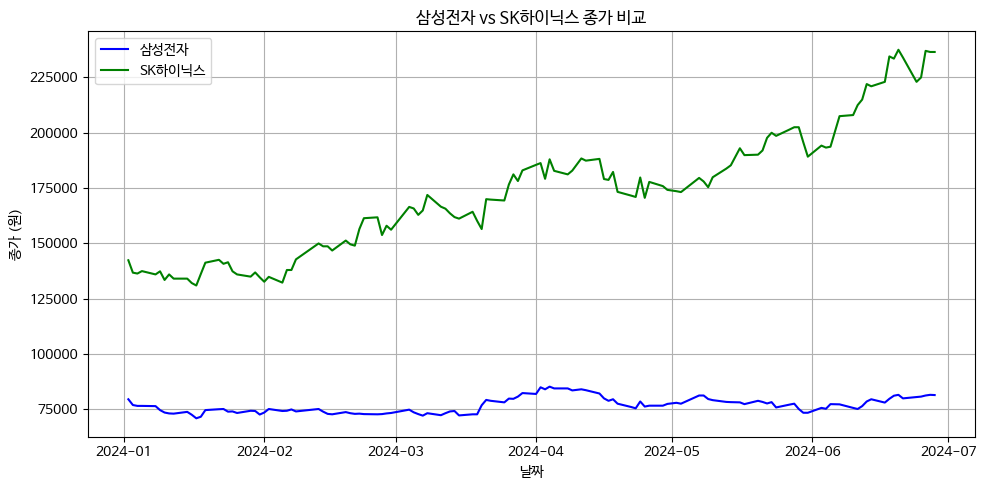

In [4]:
# 두 종목 종가 불러오기
samsung = stock.get_market_ohlcv_by_date("2024-01-01", "2024-06-30", "005930")['종가']
sk_hynix = stock.get_market_ohlcv_by_date("2024-01-01", "2024-06-30", "000660")['종가']

# 병합
df = pd.DataFrame({'삼성전자': samsung, 'SK하이닉스': sk_hynix})
df.dropna(inplace=True)

# 선 그래프
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['삼성전자'], label='삼성전자', color='blue')
plt.plot(df.index, df['SK하이닉스'], label='SK하이닉스', color='green')

plt.title('삼성전자 vs SK하이닉스 종가 비교')
plt.xlabel('날짜')
plt.ylabel('종가 (원)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 수익률 기준 선 그래프 (삼성전자 vs SK하이닉스)

In [ ]:
# df / df.iloc[0] - 1	기준일 대비 수익률 비율
# * 100	퍼센트(%)로 표현
# axhline(0)	기준선(수익률 0%)을 추가

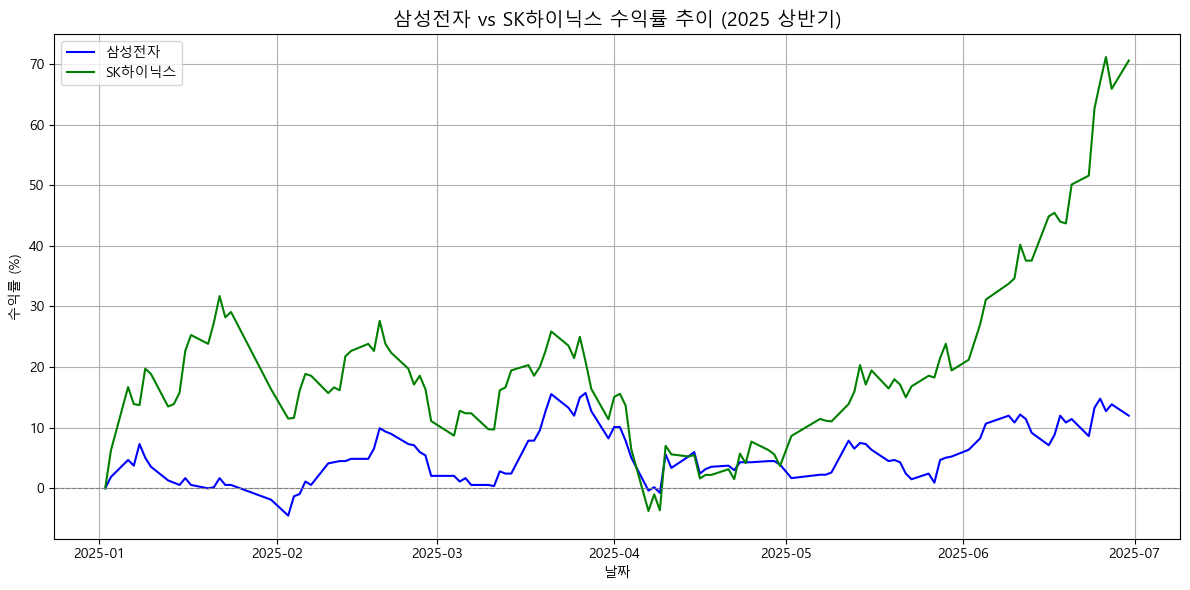

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

# 기간 설정
start_date = "2025-01-01"
end_date = "2025-06-30"

# 종목 코드
samsung = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")['종가']
sk_hynix = stock.get_market_ohlcv_by_date(start_date, end_date, "000660")['종가']

# 날짜 정렬 및 결측치 제거
df = pd.DataFrame({
    '삼성전자': samsung,
    'SK하이닉스': sk_hynix
}).dropna()

# 기준일 대비 수익률 (%) 계산
df_return = (df / df.iloc[0] - 1) * 100  # 기준일 대비 수익률

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_return.index, df_return['삼성전자'], label='삼성전자', color='blue')
plt.plot(df_return.index, df_return['SK하이닉스'], label='SK하이닉스', color='green')

# 꾸미기
plt.title('삼성전자 vs SK하이닉스 수익률 추이 (2025 상반기)', fontsize=14)
plt.xlabel('날짜')
plt.ylabel('수익률 (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # 기준선
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 그래프 해석
# 0% 기준선보다 위: 수익
# 아래: 손실
# 두 종목의 상대적인 성과 확인 가능